In [1]:
import os 
import string 
import pandas as pd 
import numpy as np
from string import digits 
import matplotlib.pyplot as plt 

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense 
from keras.models import Model 

# Get Dataset

In [2]:
train_data = pd.read_json('DATA/MT_JAVNRF_INZNTV/train_preprocess.json')
test_data = pd.read_json('DATA/MT_JAVNRF_INZNTV/test_preprocess.json')

In [3]:
train_data.drop(columns='id', inplace=True)
test_data.drop(columns='id', inplace=True)

In [4]:
train_data.head()

,text,label
0,"Wong kabèh padha gumun, temah padha takon-tin...","Mereka semua takjub, sehingga mereka memperbin..."
1,"Saka ing tutuké metu pedhang kang landhep, ka...",Dan dari mulut-Nya keluarlah sebilah pedang ta...
2,Déné kowé padha diawas! Aku wus ngandhakake...,Hati-hatilah kamu! Aku sudah terlebih dahulu m...
3,"supaya didhaftaraké bebarengan karo Maria, pa...","supaya didaftarkan bersama-sama dengan Maria, ..."
4,Allah sampun mungokaken Panjenenganipun saking...,Allah telah membangkitkan Dia dari antara oran...


In [5]:
test_data.head()

,text,label
0,"Nalika samana Hérodès, raja-wilayah, midhang...",Pada masa itu sampailah berita-berita tentang ...
1,"""Lan ing salebeting kawontenan ingkang makaten...","""Dan dalam keadaan demikian, ketika aku dengan..."
2,Margi saking punika panjenenganipun uninga sad...,Karena itu ia telah melihat ke depan dan telah...
3,Sih-rahmat nunggila ing kowé kabèh.,Kasih karunia menyertai kamu sekalian.
4,nganggo tanganku dhéwé aku nindakaké pagawe...,kami melakukan pekerjaan tangan yang berat. Ka...


# Data Preprocessing 

In [6]:
import nltk
nltk.download("punkt")
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation

[nltk_data] Downloading package punkt to C:\Users\Kania Galih
[nltk_data]     Widowati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
javanese_stopwords = pd.read_csv("local_languages_stopwords.csv")
javanese_stopwords.head()

,indonesian,javanese,sundanese
0,ada,Ana,Aya
1,adalah,yaiku,geus
2,adanya,orane,ayana
3,adapun,Kangge,Samentara éta
4,agak,Luwih,rada


In [8]:
#remove sundanese column
javanese_stopwords.drop(columns=["indonesian", "sundanese"], inplace=True)
javanese_stopwords.head()

,javanese
0,Ana
1,yaiku
2,orane
3,Kangge
4,Luwih


In [9]:
javanese_stopwords = javanese_stopwords['javanese'].tolist()
javanese_stopwords

['Ana',
 'yaiku',
 'orane',
 'Kangge',
 'Luwih',
 'Dianggo',
 'dadi ngono',
 'bakal',
 'bakal',
 'pungkasan',
 'pungkasan',
 'Pungkasane',
 'Aku',
 'kula',
 'banget',
 'Banget',
 'Sampeyan',
 'Sampeyan',
 'antarane',
 'antarane',
 'Antarane wong-wong mau',
 'Apa',
 'Apa',
 'Yen',
 'yaiku',
 'utamane',
 'Akatah',
 'Tegese',
 'Asal',
 'diwenehake',
 'ing',
 'utawa',
 'utawa iku',
 'utawa',
 'diwiwiti',
 'Wiwitane',
 'kaya',
 'kaya',
 'Kepiye',
 'Kepiye',
 'Nanging',
 'kanggo',
 'bagean',
 'Malah',
 'iku',
 'iku',
 'Apik',
 'bakal',
 'arep',
 'teka maneh',
 'Akeh',
 'Rama',
 'Anyar',
 'ngisor',
 'nomer saka',
 'Katon',
 'iki',
 'Kajaba iku',
 'Iki carane',
 'dadi',
 'Kajaba iku',
 'Iku iku',
 'Kajaba iku',
 'Nyambut gawe',
 'konco',
 'Mengko',
 'Durung',
 'durung',
 'Bener',
 'Iku bener',
 'Bener',
 'ana ing',
 'pungkasan',
 'pungkasan',
 'rampung',
 'Wonten pinten',
 'Apa',
 'Apa sing sampeyan lakoni',
 'apa wae',
 'Tegese',
 'Miwiti',
 'Macem-macem',
 'Tiba',
 'Menehi',
 'menehi',
 'Dip

In [10]:
nltk.download('stopwords', quiet=True)
indonesian_stopwords = stopwords.words('indonesian')

In [11]:
indonesian_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [12]:
def preprocess_text(text, language_label):
    #lowercase
    text = text.lower()
    #remove quotes
    text = text.strip('"')
    # Combine removing special characters, punctuation, and extra whitespace
    text = re.sub(r"[^\w\s]", "", text)  # Removes special characters
    text = "".join([char for char in text if char not in punctuation])  # Removes punctuation
    text = " ".join(text.split())  # Removes extra whitespace
    #Tokenize 
    tokens = word_tokenize(text)

    # Select stopwords based on language label
    if language_label == "label":
        stopwords = indonesian_stopwords
    elif language_label == "text":
        stopwords = javanese_stopwords
    else:
        # Default to empty set if language label is not recognized
        stopwords = set()

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords]
    

    # Join the tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text


In [13]:
train_data['label'] = train_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
train_data['text'] = train_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [14]:
test_data['label'] = test_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
test_data['text'] = test_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [15]:
train_data.head()

,text,label
0,wong kabeh padha gumun temah padha takontinako...,mereka semua takjub sehingga mereka memperbinc...
1,saka ing tutuke metu pedhang kang landhep kang...,dan dari mulutnya keluarlah sebilah pedang taj...
2,dene kowe padha diawas aku wus ngandhakake iki...,hatihatilah kamu aku sudah terlebih dahulu men...
3,supaya didhaftarake bebarengan karo maria paca...,supaya didaftarkan bersamasama dengan maria tu...
4,allah sampun mungokaken panjenenganipun saking...,allah telah membangkitkan dia dari antara oran...


In [16]:
train_data.isnull().sum()

text     0
label    0
dtype: int64

# Get Vocab 

In [17]:
# Add start and end tokens to target sequences
train_data['text'] = train_data['text'].apply(lambda x : 'START_ '+ x + ' _END')
test_data['text'] = test_data['text'].apply(lambda x : 'START_ '+ x + ' _END')

In [18]:
train_data.head()

,text,label
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...


In [19]:
test_data.head()

,text,label
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...


In [20]:
all_ind_words=set()
for ind in train_data['label']:
    for word in ind.split():
        if word not in all_ind_words:
            all_ind_words.add(word)

all_javanese_words=set()
for jav in train_data['text']:
    for word in jav.split():
        if word not in all_javanese_words:
            all_javanese_words.add(word)

In [21]:
len(all_ind_words)

6758

In [22]:
len(all_javanese_words)

9575

In [23]:
train_data['length_jav_sentence']=train_data['text'].apply(lambda x:len(x.split(" ")))
train_data['length_ind_sentence']=train_data['label'].apply(lambda x:len(x.split(" ")))

In [24]:
test_data['length_jav_sentence']=test_data['text'].apply(lambda x:len(x.split(" ")))
test_data['length_ind_sentence']=test_data['label'].apply(lambda x:len(x.split(" ")))

In [25]:
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...,31,24
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...,36,34
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...,14,11
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...,11,9
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...,42,39


In [26]:
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...,10,11
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...,23,19
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...,34,31
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian,7,5
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...,23,16


In [27]:
# Max length = 20
train_data=train_data[train_data['length_ind_sentence']<=20]
train_data=train_data[train_data['length_jav_sentence']<=20]

In [28]:
# Max length = 20
test_data=test_data[test_data['length_ind_sentence']<=20]
test_data=test_data[test_data['length_jav_sentence']<=20]

In [29]:
#Check Max Length 
print("maximum length Javanese Sentence ",max(train_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(train_data['length_ind_sentence']))

maximum length Javanese Sentence  20
maximum length Indonesian Sentence  20


In [30]:
#Check Max Length 
print("maximum length Javanese Sentence ",max(test_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(test_data['length_ind_sentence']))

maximum length Javanese Sentence  20
maximum length Indonesian Sentence  20


In [31]:
max_length_src=max(train_data['length_jav_sentence'])
max_length_tar=max(train_data['length_ind_sentence'])

In [32]:
max_length_src_test=max(test_data['length_jav_sentence'])
max_length_tar_test=max(test_data['length_ind_sentence'])

In [33]:
input_words = sorted(list(all_ind_words))
target_words = sorted(list(all_javanese_words))
num_encoder_tokens = len(all_ind_words)
num_decoder_tokens = len(all_javanese_words)
num_encoder_tokens, num_decoder_tokens

(6758, 9575)

In [34]:
num_decoder_tokens += 1 #for zero padding

In [35]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [36]:
input_token_index

{'abadi': 1,
 'abadon': 2,
 'abaikan': 3,
 'abba': 4,
 'abia': 5,
 'abihud': 6,
 'abilene': 7,
 'abraham': 8,
 'abu': 9,
 'abyatar': 10,
 'ada': 11,
 'adakah': 12,
 'adalah': 13,
 'adam': 14,
 'adanya': 15,
 'adapun': 16,
 'adat': 17,
 'adi': 18,
 'adikmu': 19,
 'adiknya': 20,
 'adil': 21,
 'adilkah': 22,
 'adilnya': 23,
 'admin': 24,
 'adonan': 25,
 'adramitium': 26,
 'agabus': 27,
 'agak': 28,
 'agaknya': 29,
 'agama': 30,
 'agamamu': 31,
 'agar': 32,
 'agripa': 33,
 'agung': 34,
 'agustus': 35,
 'ahas': 36,
 'ahli': 37,
 'ahliahli': 38,
 'aib': 39,
 'aibku': 40,
 'ainon': 41,
 'air': 42,
 'airnya': 43,
 'ajaib': 44,
 'ajakan': 45,
 'ajar': 46,
 'ajaran': 47,
 'ajaranajaran': 48,
 'ajaranku': 49,
 'ajaranmu': 50,
 'ajarannya': 51,
 'ajari': 52,
 'ajarkan': 53,
 'ajarkanlah': 54,
 'ajarlah': 55,
 'akal': 56,
 'akan': 57,
 'akar': 58,
 'akarakarnya': 59,
 'akhaikus': 60,
 'akhaya': 61,
 'akhir': 62,
 'akhirnya': 63,
 'akibat': 64,
 'akibatnya': 65,
 'akil': 66,
 'aku': 67,
 'akui': 68,

In [37]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [38]:
train_data = shuffle(train_data)
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
5882,START_ saka kodrate dhewe rak wus tetela tumra...,bukankah alam sendiri menyatakan kepadamu bahw...,19,14
3712,START_ panjenengane kang wis tumedhak iya panj...,ia yang telah turun ia juga yang telah naik ja...,17,20
4321,START_ nalika malaekat mau lumebet ing omahe m...,ketika malaikat itu masuk ke rumah maria ia be...,20,17
1975,START_ ewasamono kowe padha ora gelem marani a...,namun kamu tidak mau datang kepadaku untuk mem...,13,10
1870,START_ para sakabat tumuli padha sapocapan apa...,maka muridmurid itu berkata seorang kepada yan...,16,17


In [39]:
test_data = shuffle(test_data)
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
1079,START_ nanging aku ora ketemu rasul liyane sij...,tetapi aku tidak melihat seorang pun dari rasu...,14,15
250,START_ bakulbakul dara padha kadhawuhan mangke...,kepada pedagangpedagang merpati ia berkata amb...,20,18
1046,START_ sapa kang duwe kuping ngrungokna apa ka...,siapa bertelinga hendaklah ia mendengarkan apa...,14,11
306,START_ sarta ing sajroning roh iku uga panjene...,dan di dalam roh itu juga ia pergi memberitaka...,18,16
950,START_ amarga ing wektu iku uga roh suci bakal...,sebab pada saat itu juga roh kudus akan mengaj...,16,15


In [40]:
# Combine the DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [41]:
combined_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ saka kodrate dhewe rak wus tetela tumra...,bukankah alam sendiri menyatakan kepadamu bahw...,19,14
1,START_ panjenengane kang wis tumedhak iya panj...,ia yang telah turun ia juga yang telah naik ja...,17,20
2,START_ nalika malaekat mau lumebet ing omahe m...,ketika malaikat itu masuk ke rumah maria ia be...,20,17
3,START_ ewasamono kowe padha ora gelem marani a...,namun kamu tidak mau datang kepadaku untuk mem...,13,10
4,START_ para sakabat tumuli padha sapocapan apa...,maka muridmurid itu berkata seorang kepada yan...,16,17


# Tokenizer

In [42]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# prepare english tokenizer
java_tokenizer = tokenization(combined_data.text)
java_vocab_size = len(java_tokenizer.word_index) + 1

java_length = 20
print('Java Vocabulary Size: %d' % java_vocab_size)

# prepare indo tokenizer
indo_tokenizer = tokenization(combined_data.label)
indo_vocab_size = len(indo_tokenizer.word_index) + 1

indo_length = 20
print('indo Vocabulary Size: %d' % indo_vocab_size)

Java Vocabulary Size: 5331
indo Vocabulary Size: 4077


In [43]:
print(java_tokenizer.texts_to_sequences(combined_data.text[:1]))
print(java_tokenizer.texts_to_sequences(combined_data.text[1:2]))

[[1, 18, 2563, 79, 303, 27, 992, 87, 10, 52, 993, 994, 8, 145, 286, 995, 2564, 1694, 2]]
[[1, 14, 3, 26, 996, 34, 14, 3, 26, 845, 345, 93, 239, 33, 1695, 128, 2]]


In [44]:
X = encode_sequences(java_tokenizer, 20, combined_data.text)
y = encode_sequences(indo_tokenizer, 20, combined_data.label)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((2196, 20), (550, 20))

In [46]:
X_train[0:2]

array([[   1,  302,  142,  162,  114,   71, 3346, 3347,  102,  743,   56,
          60,   15,   27, 1158,    7, 1405,   38,   47,    2],
       [   1,    7,   31,   82,   94,   21, 1579,  778,   13, 4569,   39,
           8,  145,  147,    5,   34,  433, 1359,    2,    0]])

In [47]:
y_train[0]

array([  75,    7,    3,    7,    2,   19, 1042,  127,  487,   37,   56,
         11,   37,  136,    1, 1064,   58,    0,    0,    0])

# Save data to PKL 

In [48]:
# X_train.to_pickle('X_train.pkl')
# X_test.to_pickle('X_test.pkl')

In [49]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder Decoder 

In [50]:
latent_dim=300

In [51]:
# Encoder
encoder_inputs = Input(shape=[20])
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

encoder_states = [state_h, state_c]

In [52]:
encoder_outputs

<KerasTensor shape=(None, 300), dtype=float32, sparse=False, name=keras_tensor_3>

In [53]:
decoder_inputs = Input(shape=[20])
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(indo_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [54]:
model.compile(optimizer='AdamW', loss='sparse_categorical_crossentropy')

In [55]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 20, 300)   │  2,027,400 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 20)        │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 20, 300)   │  2,872,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 300),     │    721,200 │ embedding[0][0],  │
│                     │ (None, 300),      │            │ not_equal[0][0]   │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 20, 300), │    721,200 │ embedding_1[0][0… │
│                     │ (None, 300),      │            │ lstm[0][1],       │
│                     │ (None, 300)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 20, 4077)  │  1,227,177 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,569,777 (28.88 MB)

 Trainable params: 7,569,777 (28.88 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 200

In [57]:
X_train.shape

(2196, 20)

In [58]:
X_test.shape

(550, 20)

In [59]:
y_train.shape

(2196, 20)

In [60]:
history = model.fit(
    [X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1)], y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - loss: 8.1162 - val_loss: 6.5708
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - loss: 6.4802 - val_loss: 6.6186
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - loss: 6.3131 - val_loss: 6.3616
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - loss: 6.0202 - val_loss: 5.9318
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 5.6243 - val_loss: 5.5751
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - loss: 5.2814 - val_loss: 5.2448
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - loss: 4.9183 - val_loss: 4.8804
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - loss: 4.5510 - val_loss: 4.5345
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - loss: 4.2401 - val_loss: 4.2302
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - loss: 3.8839 - val_loss: 3.9611
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - loss: 3.6063 - val_loss: 3.7260
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 

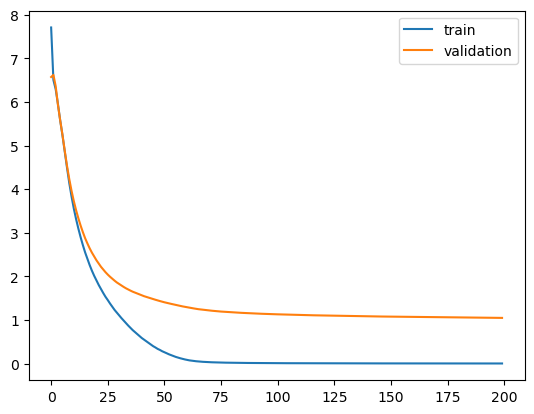

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [62]:
model.save('model_lstm.keras')

In [63]:
preds = model.predict([X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)])

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


# Model Inference 

In [64]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [65]:
def decode_sequences(tokenizer, sequences):
    decoded_texts = []
    for sequence in sequences:
        decoded_words = []
        for int_val in sequence:
            word = get_word(int_val, tokenizer)
            if word is not None:
                decoded_words.append(word)
        decoded_texts.append(' '.join(decoded_words))
    return decoded_texts

In [80]:
preds_text = []

for i, pred in enumerate(preds):
    temp = []
    for j, token_probs in enumerate(pred):
        predicted_word_index = np.argmax(token_probs)
        t = get_word(predicted_word_index, indo_tokenizer)
        if j > 0:
            if (t == get_word(np.argmax(pred[j-1]), indo_tokenizer)) or (t is None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if t is None:
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [81]:
decoded_texts = decode_sequences(indo_tokenizer,y_test)
decoded_texts

['rasa takut kepada allah tidak ada pada orang itu',
 'tunjukkanlah belas kasihan kepada mereka yang raguragu',
 'sebab engkau tidak menyerahkan aku kepada dunia orang mati dan tidak membiarkan orang kudusmu melihat kebinasaan',
 'karena mereka tidak menemukan dia kembalilah mereka ke yerusalem sambil terus mencari dia',
 'jika karunia untuk melayani baiklah kita melayani jika karunia untuk mengajar baiklah kita mengajar',
 'lalu sedihlah hati raja tetapi karena sumpahnya dan karena tamutamunya diperintahkannya juga untuk memberikannya',
 'dan ia tinggal berdiri di pantai laut',
 'dan setelah paulus berkata demikian pergilah orangorang yahudi itu dengan banyak perbedaan paham antara mereka',
 'ia berkata kepada mereka bangsa akan bangkit melawan bangsa dan kerajaan melawan kerajaan',
 'jika mereka melihat bagaimana murni dan salehnya hidup isteri mereka itu',
 'sebab di dalam dia dan oleh darahnya kita beroleh penebusan yaitu pengampunan dosa menurut kekayaan kasih karunianya',
 'kami 

In [82]:
for pred, actual in zip(preds_text, decoded_texts):
    print("Predicted:", pred)
    print("Actual:", actual)
    print()  # Print a blank line for better readability

Predicted: sampaikan takut kepada allah tidak ada pada orang itu mengoyakkan itu    dan   empedu dan 
Actual: rasa takut kepada allah tidak ada pada orang itu

Predicted: tunjukkanlah belas kasihan kepada mereka yang raguragu dan            
Actual: tunjukkanlah belas kasihan kepada mereka yang raguragu

Predicted: sebab engkau tidak menyerahkan aku kepada dunia orang mati dan tidak membiarkan orang terhormat melihat kebinasaan filipi empedu  dan
Actual: sebab engkau tidak menyerahkan aku kepada dunia orang mati dan tidak membiarkan orang kudusmu melihat kebinasaan

Predicted: karena mereka tidak menemukan dia kembalilah mereka ke yerusalem sambil terus mencari dia dan selamatkanlah itu  dan  
Actual: karena mereka tidak menemukan dia kembalilah mereka ke yerusalem sambil terus mencari dia

Predicted: jika karunia untuk melayani baiklah kita melayani jika karunia untuk mengajar baiklah kita mengajar mutiara itu  dan  
Actual: jika karunia untuk melayani baiklah kita melayani jika karun

In [83]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

In [86]:
# actual = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita lanjutkan itu  dan ')
# pred = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita')

references = [actual]

# Calculate BLEU score
bleu_score = sentence_bleu(references, pred)
print(f'Sentence BLEU score: {bleu_score:.2f}')

Sentence BLEU score: 0.74
